<a href="https://colab.research.google.com/github/BCFMello/BCFMello/blob/main/Unsupervised_Ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  


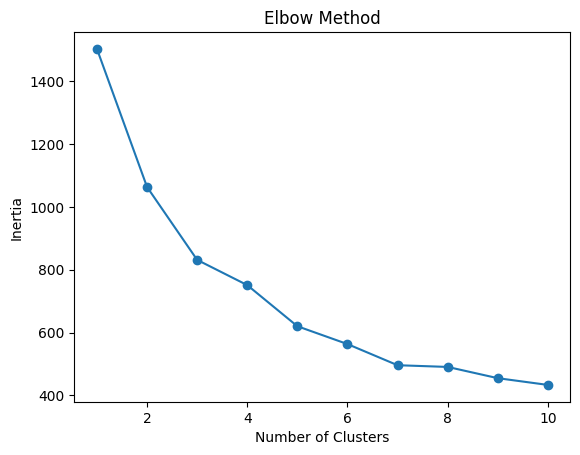

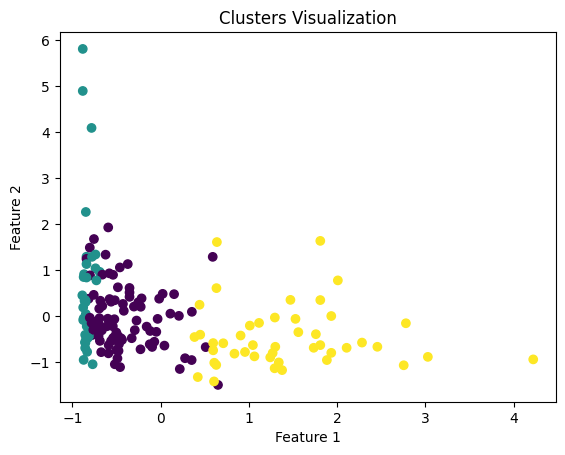

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Load the data
file_path = '/content/Country-data.csv'
data = pd.read_csv(file_path)

# Step 2: Inspect the data
print(data.head())

# Step 3: Preprocess the data
# Dropping non-numeric columns if any (modify as needed)
numeric_data = data.select_dtypes(include='number')

# Handling missing values
numeric_data.fillna(numeric_data.mean(), inplace=True)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Step 4: Determine optimal clusters using Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Step 5: Apply K-Means with optimal k (e.g., 3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Step 6: Visualize the clusters (2D plot)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=data['Cluster'], cmap='viridis')
plt.title('Clusters Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
